# Color Manipulation of Images


## 1.1 Using Open CV convert original image to grayscale image(20%)

**You can find useful functions HERE:**


https://docs.opencv.org/3.4/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [1]:
# Mount google drive
import cv2
import matplotlib.pyplot as plt
import numpy as np

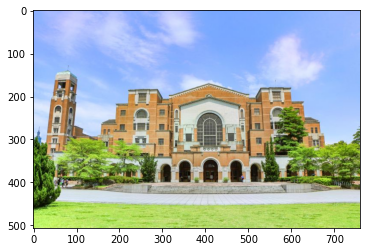

In [2]:
# Reading an image in default mode

path = './Image1.jpg'
originalImage = cv2.imread(path)
image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


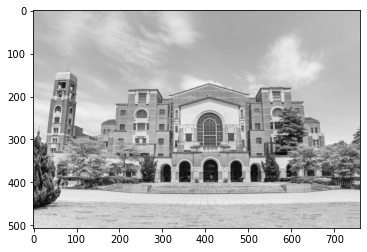

In [3]:
# Convert the image to gray scale

grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY ) 
plt.imshow(grayImage, cmap='gray')
plt.show()



## 1.2 Converting Gray to Black and White Image(20%)

The threshold function takes input of **grayscale image, the threshold value, max value, and type.**

We will consider the value **127**, which is in the middle of the scale of the values a pixel in gray scale can take (from 0 to 255).

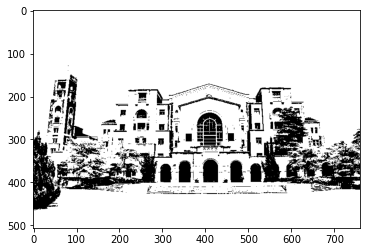

In [4]:
# Convert the gray image to black and white image
thresh, blackAndWhiteImage  = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()

## 1.3 Using Pillow Library convert original image to grayscale image(20%)

**You can find some useful functions HERE:**

https://pillow.readthedocs.io/en/stable/reference/Image.html 

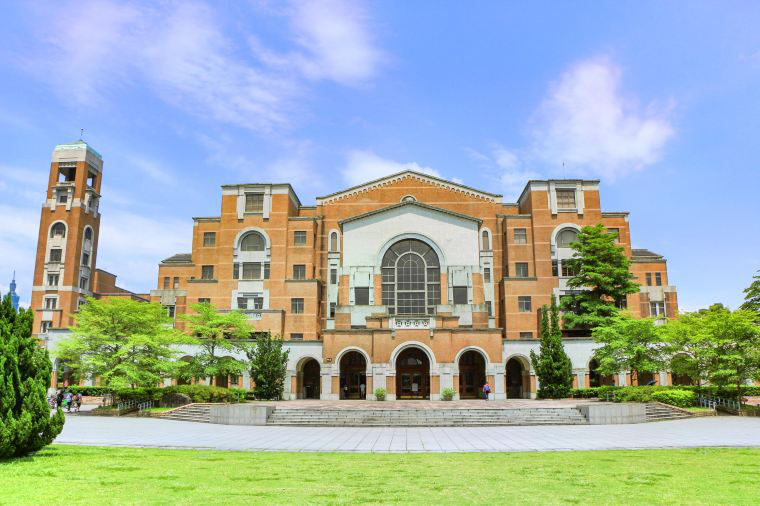

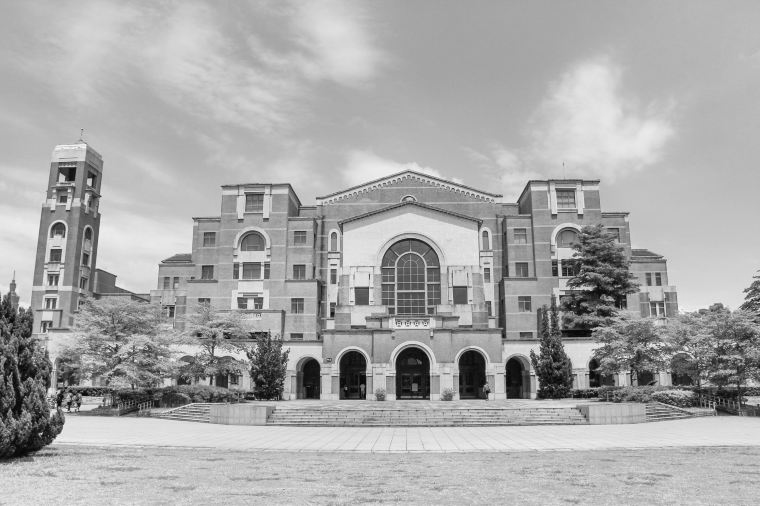

In [5]:
from PIL import Image

# Open the image using PIL
org_img = Image.open(path)
display(org_img)

# Convert the image to grayscale
gray_img = org_img.convert('L')
display(gray_img)



---


## 2.1 Use OpenCV for color channel manipulation(20%)

Take an Image and **resize it to 50%** of it's original size. 

Then convert the **Red color channel into 10%** of it's original intensity.


(New Red channel value = 0.1*original red channel value)



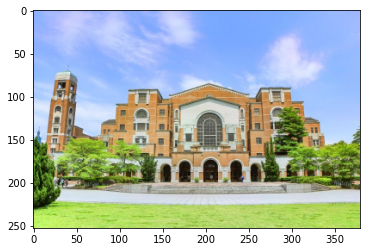

In [6]:
# Resize the Image
org_img = cv2.imread(path)
scale= 0.5
height, width, channels =org_img.shape

dim = (int(width/2), int(height/2))
resized_img = cv2.resize(org_img, dim, interpolation=cv2.INTER_AREA)

# Show the resized image
image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

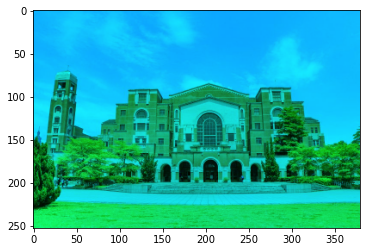

In [7]:

# Red channel manipulation
b,g,r=cv2.split(resized_img)
r = np.uint8(r*0.1)
resized_img=cv2.merge([b,g,r])        
# Show the manipulated images
image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

## 2.2 Creating color mask using OpenCV(20%)

In this section we will try to color mask the construction safety vests.

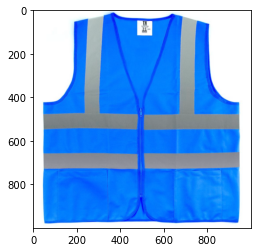

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Open the safety vest image using OpenCV
path = './safetyvest.jpg'
safetyvest = cv2.imread(path)

# Show the image
plt.imshow(safetyvest)
plt.show()

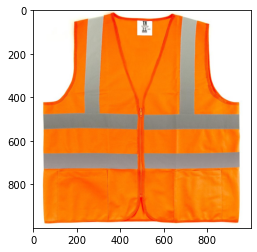

In [9]:
# Are the colors correct in this image?
# Open CV represents color channel as BRG instead of RGB

# Convert BGR to RGB
safetyvest = cv2.cvtColor(safetyvest, cv2.COLOR_BGR2RGB)
# Show the image
plt.imshow(safetyvest)
plt.show()

### Visualizing the image in HSV Color Space

HSV stands for **Hue, Saturation, and Value (or brightness)**, and is a cylindrical color space. 

The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. 

Values go from dark (0 at the bottom) to light at the top. 

The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center.

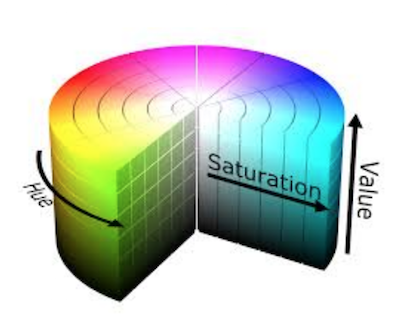

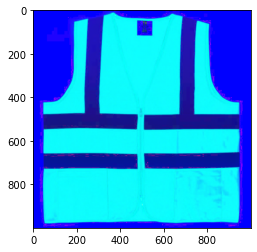

In [10]:
# Convert the image in HSV space
hsv_sv = cv2.cvtColor(safetyvest, cv2.COLOR_RGB2HSV) 

# Show the image
plt.imshow(hsv_sv)
plt.show()

### Creating a color mask
You can choose the range by using a color picking app online such as this RGB to HSV tool.


https://toolstud.io/color/rgb.php

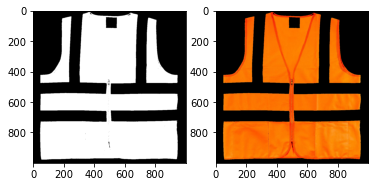

In [11]:
# Define the range of orange.
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Create a binary mask within the range. 
# If the pixel value is within the range it will return 1 or else 0.

mask = cv2.inRange(hsv_sv , light_orange,dark_orange) 

# To impose the mask on top of the original image,
# you can use cv2.bitwise_and(), which keeps every pixel in the given image if the corresponding value in the mask is 1

result = cv2.bitwise_and(safetyvest, safetyvest, mask = mask)
#use cv2.bitwise_and() to create a result image



# Use sub plot for showing both the images side by side
plt.subplot(121)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

# 3.1 Bonus(25%)

##Collage Maker: Organize your maniplulated images into a photo collage

In this task you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to generate the following output image: Once you are done with the color changes. You should create a photo collage with all the manipulated images.


From the output image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: You shoud resize the image to the 50% of its original size.
Also you should resize the collage by 50%



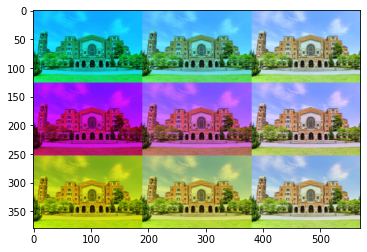

In [13]:
# Code for creating 9 manipulated images
new_img = cv2.resize(originalImage, (originalImage.shape[1]//2, originalImage.shape[0]//2))

b,g,r=cv2.split(new_img)

new_r = np.uint8(r*0.1)
resized_img00=cv2.merge([b,g,new_r])
new_r = np.uint8(r*0.5)
resized_img01=cv2.merge([b,g,new_r])
new_r = np.uint8(r*0.9)
resized_img02=cv2.merge([b,g,new_r])

new_g = np.uint8(g*0.1)
resized_img10=cv2.merge([b,new_g,r])
new_g = np.uint8(g*0.5)
resized_img11=cv2.merge([b,new_g,r])
new_g = np.uint8(g*0.9)
resized_img12=cv2.merge([b,new_g,r])

new_b = np.uint8(b*0.1)
resized_img20=cv2.merge([new_b,g,r])
new_b = np.uint8(b*0.5)
resized_img21=cv2.merge([new_b,g,r])
new_b = np.uint8(b*0.9)
resized_img22=cv2.merge([new_b,g,r])

result0=np.hstack((resized_img00,resized_img01,resized_img02))
result1=np.hstack((resized_img10,resized_img11,resized_img12))
result2=np.hstack((resized_img20,resized_img21,resized_img22))
result=np.vstack((result0,result1,result2))

result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
result = cv2.resize(result , (result .shape[1]//2, result .shape[0]//2))
plt.imshow(result)
plt.show()
result = Image.fromarray(result)
result.save('result.png')